# Numerical Methods For Ordinary Differential Equations

References:
>
> 1. Chasnov, J. R. (2012). Numerical methods. Hong Kong University of Science and Technology. <https://www.math.hkust.edu.hk/~machas/numerical-methods.pdf>
> 2. Liu, J., Spiegel, M. R. (1999). Mathematical Handbook of Formulas and Tables. United Kingdom: McGraw-Hill.

Here we give methods to solve the following initial-value problem of an ordinary differential equation:

$$
\tag{1}
\left\{
\begin{aligned}
\frac{dx}{dt} &= f(t,x) \\
x(t_0) &= x_0
\end{aligned}
\right.
$$

The methods will use a computational grid:

$$
\tag{2}
t_n = t_0 + nh
$$
where $h$ is the grid size.

## Example

Consider $f(t,x)=rx(K-x)$, with the following parameters:

In [ ]:
r = 0.15
K = 100
t0 = 0
tf = 1
x0 = 1
n = 10
step_size =  (tf-t0)/n
step_size

1/10

In [ ]:
t = var('t')

x = function('x')(t)

ode = x.diff(t) == r*x*(K-x) 

solution = desolve(ode, dvar=x, ivar=t, ics=[t0,x0])

solution

-1/15*log(x(t) - 100) + 1/15*log(x(t)) == -1/15*I*pi + t - 1/15*log(99)

In [ ]:
u = var('u')
solution = solution.subs({x: u})
solution 

-1/15*log(u - 100) + 1/15*log(u) == -1/15*I*pi + t - 1/15*log(99)

In [ ]:
solution.solve(u, to_poly_solve=True)

[u == 100*e^(15*t)/(e^(15*t) + 99)]

In [ ]:
x_exact = solution.solve(u, to_poly_solve=True)[0].rhs()
x_exact

100*e^(15*t)/(e^(15*t) + 99)

In [ ]:
custom_grid = [t0 + i*step_size for i in range(n)]
exact_solution = [[_t.n(), x_exact(t=_t).n()] for _t in custom_grid]

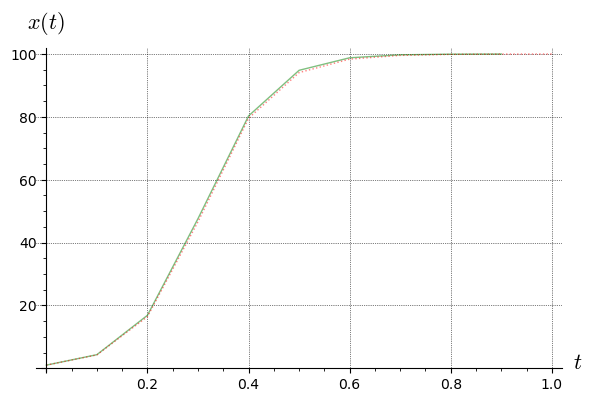

In [ ]:
t,x = var('t x')
numerical_solution = desolve_rk4( r*x*(K-x), x, ivar = t, ics=[t0,x0], end_points=tf, step=step_size)
sage_solution = list_plot(exact_solution, plotjoined=True, axes_labels=['$t$', '$x(t)$'], gridlines=True, alpha=0.5, color="green")
sage_solution += list_plot(numerical_solution, plotjoined=True, alpha=0.5, color="red", linestyle=":")
sage_solution.show()

### Euler Method: Manual Reproduction of the Code

We consider the ODE:

$$
\frac{dx}{dt} = 0.15\,x(100 - x), \quad x(0) = 1
$$

with parameters:

- $r = 0.15$
- $K = 100$
- $t_0 = 0$, $t_f = 1$
- $x_0 = 1$
- $n = 10$, $h = \frac{1 - 0}{10} = 0.1$

Euler's method iterates:

$$
x_{n+1} = x_n + h \cdot f(t_n, x_n)
\quad \text{where} \quad f(t, x) = 0.15\,x(100 - x)
$$

#### Iteration Table

| Step $n$ | $t_n$ | $x_n$         |
|-------------|-----------|--------------------|
| 0           | 0.0       | 1.000000           |
| 1           | 0.1       | 2.485000           |
| 2           | 0.2       | 6.119872           |
| 3           | 0.3       | 14.737887          |
| 4           | 0.4       | 33.586637          |
| 5           | 0.5       | 67.045660          |
| 6           | 0.6       | 100.187342         |
| 7           | 0.7       | 99.905803          |
| 8           | 0.8       | 100.046966         |
| 9           | 0.9       | 99.976484          |
| 10          | 1.0       | 100.011750         |


In [ ]:
def euler_method(f, x0, t0, t_end, h):
    """
    Implements the Euler method for solving x' = f(t, x)

    Parameters:
        f: a function of (t, x)
        x0: initial value x(t0)
        t0: initial time
        t_end: final time
        h: step size

    Returns:
        A list of (t, x) points
    """
    steps = int((t_end - t0) / h)
    t_vals = [t0]
    x_vals = [x0]

    t = t0
    x = x0

    for _ in range(steps):
        x = x + h * f(t, x)
        t = t + h
        t_vals.append(t)
        x_vals.append(x)

    return list(zip(t_vals, x_vals))

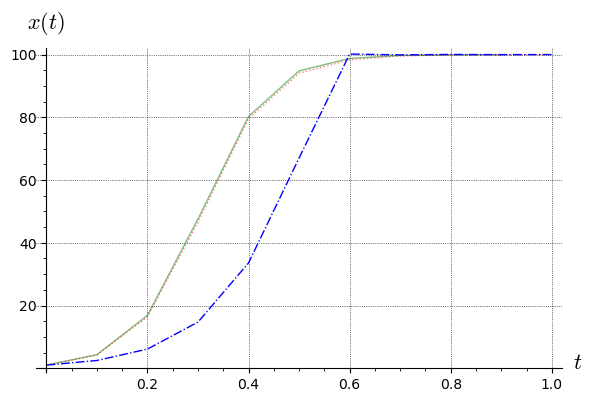

In [ ]:
t, x = var('t x')
f(t, x) = r * x * (K - x)  # logistic equation

solution = euler_method(f, x0=x0, t0=t0, t_end=tf, h=step_size)

# Plot
euler_solution = list_plot(solution, plotjoined=True, axes_labels=['$t$', '$x(t)$'], gridlines=True, linestyle="-.")
compare_euler = sage_solution + euler_solution
compare_euler.plot()



### Modified Euler Method (Heun's Method)

Update rule:

$$
\begin{aligned}
k_1 &= h \cdot f(t_n, x_n) \\
k_2 &= h \cdot f(t_n + h, x_n + k_1) \\
x_{n+1} &= x_n + \frac{1}{2}(k_1 + k_2)
\end{aligned}
$$

#### Iteration Table

| Step $n$ | $t_n$ | $x_n$         |
|-------------|-----------|--------------------|
| 0           | 0.0       | 1.000000           |
| 1           | 0.1       | 3.559936           |
| 2           | 0.2       | 12.098199          |
| 3           | 0.3       | 35.210581          |
| 4           | 0.4       | 68.238787          |
| 5           | 0.5       | 83.927939          |
| 6           | 0.6       | 90.793752          |
| 7           | 0.7       | 94.480669          |
| 8           | 0.8       | 96.624886          |
| 9           | 0.9       | 97.916019          |
| 10          | 1.0       | 98.706641          |


In [ ]:
def modified_euler_method(f, x0, t0, t_end, h):
    """
    Implements the Modified Euler method (Heun's Method) for solving x' = f(t, x)

    Parameters:
        f: a function of (t, x)
        x0: initial value x(t0)
        t0: initial time
        t_end: final time
        h: step size

    Returns:
        A list of (t, x) points
    """
    steps = int((t_end - t0) / h)
    t_vals = [t0]
    x_vals = [x0]

    t = t0
    x = x0

    for _ in range(steps):
        k1 = h*f(t, x)
        k2 = h*f(t + h, x + k1)
        x = x + 1/2 * (k1 + k2)
        t = t + h
        t_vals.append(t)
        x_vals.append(x)

    return list(zip(t_vals, x_vals))


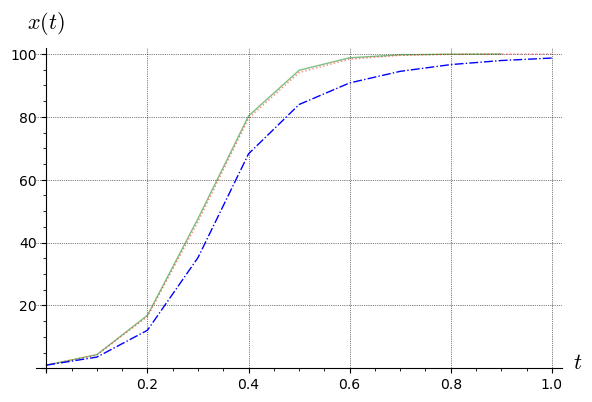

In [ ]:
solution = modified_euler_method(f, x0=x0, t0=t0, t_end=tf, h=step_size)

# Plot the numerical approximation
heun_solution = list_plot(solution, plotjoined=True, axes_labels=['$t$', '$x(t)$'], gridlines=True, linestyle="-.")
compare_heun = sage_solution + heun_solution
compare_heun.plot()


### Runge-Kutta 2nd Order Method (General Form)

With parameters:

- $\alpha = \frac{1}{2}$
- $\beta = \frac{1}{2}$
- $a = 0$, $b = 1$

The method iterates:

$$
\begin{aligned}
k_1 &= h \cdot f(t_n, x_n) \\
k_2 &= h \cdot f(t_n + \alpha h, x_n + \beta k_1) \\
x_{n+1} &= x_n + a \cdot k_1 + b \cdot k_2
\end{aligned}
$$

#### Iteration Table

| Step $n$ | $t_n$ | $x_n$         |
|-------------|-----------|--------------------|
| 0           | 0.0       | 1.000000           |
| 1           | 0.1       | 3.568205           |
| 2           | 0.2       | 12.224380          |
| 3           | 0.3       | 36.467980          |
| 4           | 0.4       | 73.746264          |
| 5           | 0.5       | 89.280670          |
| 6           | 0.6       | 94.404944          |
| 7           | 0.7       | 96.815240          |
| 8           | 0.8       | 98.112218          |
| 9           | 0.9       | 98.856498          |
| 10          | 1.0       | 99.298710          |


In [ ]:
def rk2_general_form(f, x0, t0, t_end, h=0.01,
                       alpha=1/2, beta=1/2, a=0, b=1):
    """
    General second-order Runge-Kutta method using parameters alpha, beta, a, b.

    Solves x' = f(t, x) over [t0, t_end] with initial condition x(t0) = x0.

    Parameters:
        f: right-hand side function f(t, x)
        x0: initial condition x(t0)
        t0: initial time
        t_end: final time
        h: time step size
        alpha: time increment coefficient for k2
        beta: slope coefficient for k2
        a, b: weights for k1 and k2 in the update

    Returns:
        List of (t, x) points approximating the solution
    """
    steps = int((t_end - t0) / h)
    t_vals = [t0]
    x_vals = [x0]

    t = t0
    x = x0

    for _ in range(steps):
        k1 = h * f(t, x)
        k2 = h * f(t + alpha * h, x + beta * k1)
        x = x + a * k1 + b * k2
        t = t + h
        t_vals.append(t)
        x_vals.append(x)

    return list(zip(t_vals, x_vals))


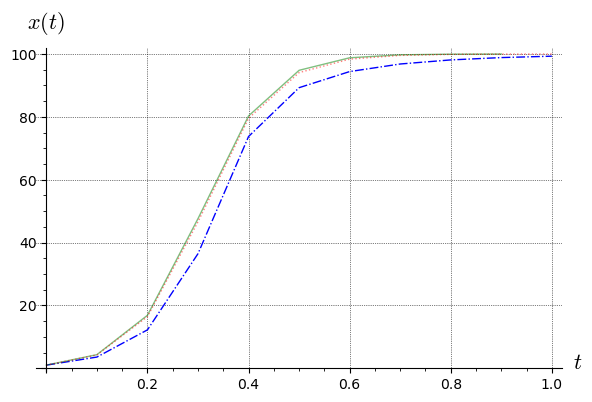

In [ ]:
sol = rk2_general_form(f, x0=x0, t0=t0, t_end=tf, h=step_size)

heun_solution  = list_plot(sol, plotjoined=True, axes_labels=['$t$', '$x(t)$'], gridlines=True, linestyle="-.")
compare_heun = heun_solution  + sage_solution
compare_heun.plot()



### Runge-Kutta 2nd Order Method — Ralston's Method

Parameters:

- $\alpha = \frac{3}{4}$
- $\beta = \frac{3}{4}$
- $a = \frac{1}{3}$, $b = \frac{2}{3}$

The method iterates:

$$
\begin{aligned}
k_1 &= h \cdot f(t_n, x_n) \\
k_2 &= h \cdot f\left(t_n + \alpha h, x_n + \beta k_1\right) \\
x_{n+1} &= x_n + a \cdot k_1 + b \cdot k_2
\end{aligned}
$$

#### Iteration Table

| Step $n$ | $t_n$ | $x_n$         |
|-------------|-----------|--------------------|
| 0           | 0.0       | 1.000000           |
| 1           | 0.1       | 3.564071           |
| 2           | 0.2       | 12.161179          |
| 3           | 0.3       | 35.834899          |
| 4           | 0.4       | 70.962143          |
| 5           | 0.5       | 86.778367          |
| 6           | 0.6       | 92.828066          |
| 7           | 0.7       | 95.838010          |
| 8           | 0.8       | 97.505961          |
| 9           | 0.9       | 98.479518          |
| 10          | 1.0       | 99.063879          |


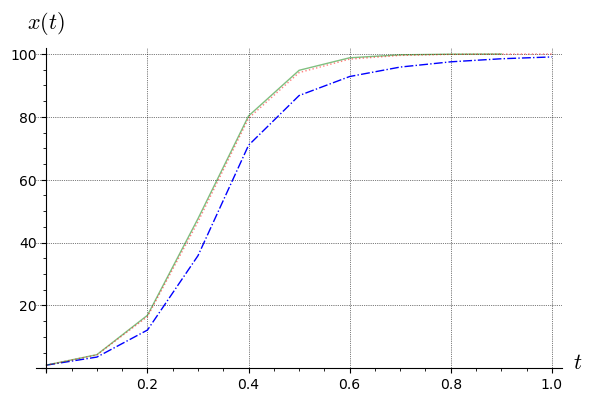

In [ ]:
sol = rk2_general_form(f, x0=x0, t0=t0, t_end=tf, h=step_size, alpha=3/4, beta=3/4, a=1/3, b=2/3)

ralston_solution  = list_plot(sol, plotjoined=True, axes_labels=['$t$', '$x(t)$'], gridlines=True, linestyle="-.")
compare_heun = ralston_solution  + sage_solution
compare_heun.plot()


### Runge-Kutta 4th Order Method (RK4)

The method iterates:

$$
\begin{aligned}
k_1 &= h \cdot f(t_n, x_n) \\
k_2 &= h \cdot f\left(t_n + \frac{h}{2}, x_n + \frac{k_1}{2}\right) \\
k_3 &= h \cdot f\left(t_n + \frac{h}{2}, x_n + \frac{k_2}{2}\right) \\
k_4 &= h \cdot f(t_n + h, x_n + k_3) \\
x_{n+1} &= x_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{aligned}
$$

#### Iteration Table

| Step $n$ | $t_n$ | $x_n$         |
|-------------|-----------|--------------------|
| 0           | 0.0       | 1.000000           |
| 1           | 0.1       | 4.259248           |
| 2           | 0.2       | 16.428180          |
| 3           | 0.3       | 46.613716          |
| 4           | 0.4       | 79.536875          |
| 5           | 0.5       | 94.077402          |
| 6           | 0.6       | 98.359221          |
| 7           | 0.7       | 99.549650          |
| 8           | 0.8       | 99.876726          |
| 9           | 0.9       | 99.966283          |
| 10          | 1.0       | 99.990780          |

In [ ]:
def rk4(f, x0, t0, t_end, h=0.01):
    """
    Fourth-order Runge-Kutta method as specified in the image.
    
    Solves x' = f(t, x) over [t0, t_end] with initial condition x(t0) = x0.
    
    Parameters:
        f: right-hand side function f(t, x)
        x0: initial condition x(t0)
        t0: initial time
        t_end: final time
        h: time step size 
        
    Returns:
        List of (t, x) points approximating the solution
    """
    steps = int((t_end - t0) / h)
    t_vals = [t0]
    x_vals = [x0]
    
    t = t0
    x = x0
    
    for _ in range(steps):
        # Calculate the four k values according to the formulas
        k1 = h * f(t, x)
        k2 = h * f(t + 0.5 * h, x + 0.5 * k1)
        k3 = h * f(t + 0.5 * h, x + 0.5 * k2)
        k4 = h * f(t + h, x + k3)
        
        # Update x using the weighted average
        x = x + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        
        # Increment time
        t = t + h
        
        # Store results
        t_vals.append(t)
        x_vals.append(x)
    
    return list(zip(t_vals, x_vals))

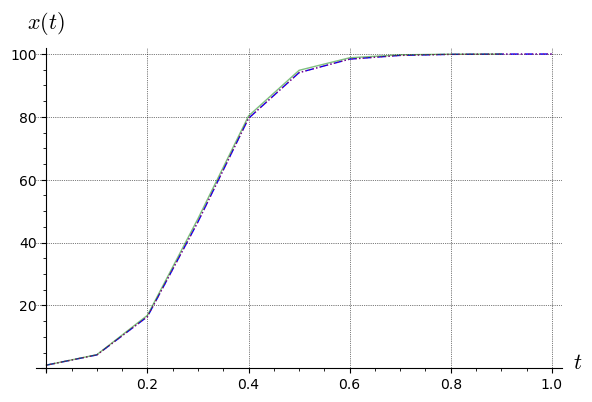

In [ ]:
sol = rk4(f, x0=x0, t0=t0, t_end=tf, h=step_size)

rk4_solution  = list_plot(sol, plotjoined=True, axes_labels=['$t$', '$x(t)$'], gridlines=True, linestyle="-.")
compare_rk4 = rk4_solution  + sage_solution
compare_rk4.plot()